# Flight Price Prediction 

In the Dataset we have Flight Travel Price listing for various locations in India. The time period of the data is from March 1st 2019 to June 9th 2019. Based on the given data create a Machine Learning model to predict the Flight price for future dates based on the given factors

In [1]:
#Importing image
from IPython.display import Image
image = Image("plane.png")

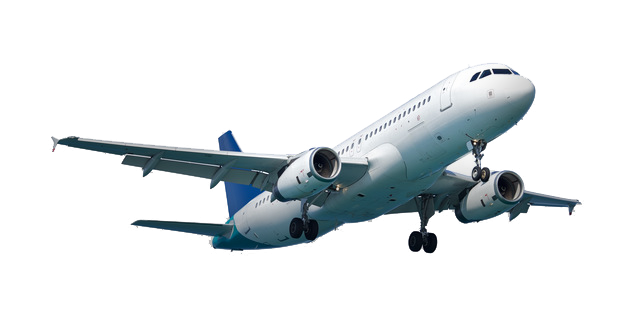

In [2]:
#Displaying Image
image

## Importing Libraries

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [5]:
#Loading Dataset
df = pd.read_excel("Data_Train.xlsx")

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Check the shape of Data Set 

In [7]:
df.shape

(10683, 11)

### Checking Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Checking Dataset Columns

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Checking Dataset Datatypes

In [10]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Checking for Null Values

In [11]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We find some null values in the **Route** and **Total_Stops** columns

### Handling Null Values

Since the Null Values in this Dataset cannot be replaced by any others values and as the null values in the Data set are only two, let us drop the Null values from the Dataset.

### Dropping Null Values 

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now there are no null values in the Dataset

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Exploratory Data Analysis (EDA)

In [15]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:>

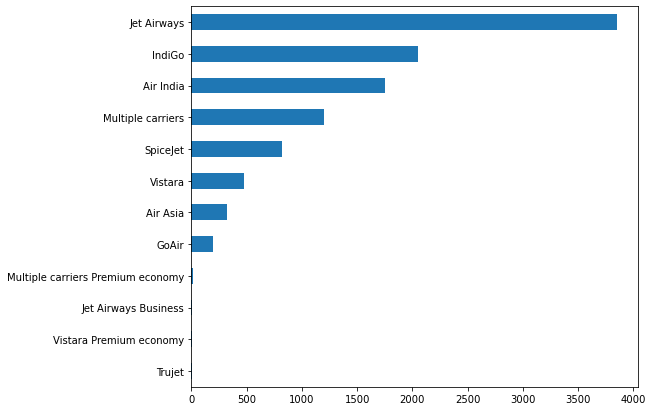

In [16]:
plt.figure(figsize=(8,7))
df['Airline'].value_counts().sort_values().plot(kind='barh')

We can see that there are so many flights trip with **Jet Airways** followed by **Indigo** and **Air India**

In [17]:
df['Date_of_Journey'].sort_values()

1918    01/03/2019
7902    01/03/2019
8897    01/03/2019
9546    01/03/2019
9182    01/03/2019
           ...    
2875     9/06/2019
2874     9/06/2019
2873     9/06/2019
6479     9/06/2019
7297     9/06/2019
Name: Date_of_Journey, Length: 10682, dtype: object

We can see that the data is between **March 1st 2019** to **June 9th 2019**

In [18]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

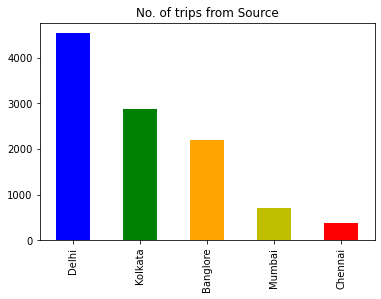

In [19]:
df['Source'].value_counts().plot(kind = 'bar', color = ['b','g','orange','y','r'])
plt.title('No. of trips from Source')
plt.show()

We can see that there are more number of trips starting from **Delhi** followed by **Kolkata** and **Banglore**

In [20]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

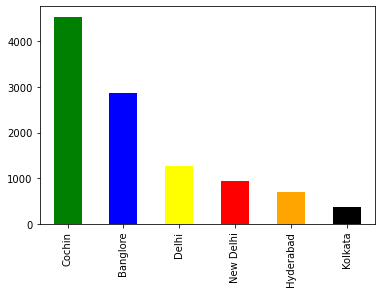

In [21]:
df['Destination'].value_counts().plot(kind='bar', color=['g','b','yellow','red','orange','black'])

We can see that **Cochin** is the most seen Destination in the Dataset trips followed by **Banglore** and **Delhi**

In [22]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [23]:
print("Percentage of No info: {:.2f}".format(len(df[df['Additional_Info'] == 'No info'])/len(df)*100))

Percentage of No info: 78.11


We can see that there more than **78%** of data that has **no information** in the additional information field and we cannot replace then with any other values. So this column of **Additional_Info** is not useful for our data analysis. Hence we are dropping that column.

In [24]:
df = df.drop('Additional_Info', axis=1)

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [26]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:>

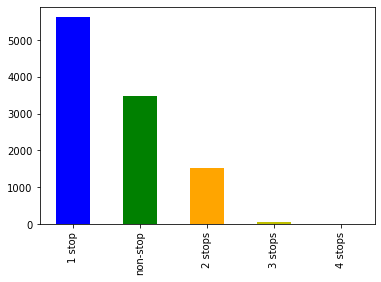

In [27]:
df['Total_Stops'].value_counts().plot(kind='bar', color = ['b','g','orange','y','r'])

Based on the graph we can see the more people are preferring **1 Stop** trips followed by **Non-Stop** trips.

### Handling Date_of_Journey Field

Dividing Date of Journey to Date and Month as the year for the whole data set is same.

In [28]:
#Extracting Date
df['Journey_Date'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [29]:
#Extracting Month
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [30]:
# Extracting Day
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.strftime("%A")

Now let us frop Date_of_Journey columns from the Dataset

In [31]:
df = df.drop('Date_of_Journey', axis=1)

In [32]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,Wednesday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,Sunday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,Sunday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,Friday


In [33]:
df['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → HBX → BOM → AMD → DEL             1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → GOI → HYD                         1
BOM → DED → DEL → HYD                   1
BOM → JAI → DEL → HYD                   1
Name: Route, Length: 128, dtype: int64

We can see that the **Route** Column is not useful for the analysis of our data. So we are dropping the column.

In [34]:
df = df.drop('Route', axis=1)

#### Dealing with Departure Time

In [35]:
#Extracting Departure Hour
df['Dept_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [36]:
#Extracting Departure Minute
df['Dept_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

Now let us drop the Departure time column **Dep_Time** from the data set

In [37]:
df = df.drop('Dep_Time', axis=1)

In [38]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dept_Hour,Dept_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,Sunday,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,Wednesday,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,Sunday,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,Sunday,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,Friday,16,50


#### Dealing with Arrival_Time

In [39]:
#Extracting Arrival Hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [40]:
# Extracting Arrival Minute
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

Now let us drop the **'Arrival_Time'** column from the Dataset

In [41]:
df = df.drop('Arrival_Time', axis=1)

In [42]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,Wednesday,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,Sunday,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,Sunday,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,Friday,16,50,21,35


#### Dealing with Total_Stops

In [43]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In this Dataset let us replace Non Stop with 0 and remaining with 1,2,3 and 4

In [44]:
df['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace = True)

In [45]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

We have changed the string values to numerical values

#### Dealing with Duration

In [46]:
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [47]:
# Now let us try to bring the Duration into single scale which is minutes

df['Duration_Hour'] = df['Duration'].str.split(" ", expand=True)[0]

In [48]:
df['Duration_Minute'] = df['Duration'].str.split(' ', expand=True)[1]

In [49]:
df['Duration_Hour'].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In [50]:
df['Duration_Hour'] = df['Duration_Hour'].str.split('h', expand=True)[0]

In [51]:
df['Duration_Minute'] = df['Duration_Minute'].str.split('m', expand=True)[0]

In [52]:
df['Duration_Hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [53]:
df['Duration_Hour'] = df['Duration_Hour'].str.replace('5m','5')

In [54]:
df['Duration_Hour'] = df['Duration_Hour'].astype('int64')

In [55]:
df['Duration_Minute'].fillna('0', inplace=True)

In [56]:
df['Duration_Minute'] = df['Duration_Minute'].astype('int64')

In [57]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,Wednesday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,Sunday,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,Sunday,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,Friday,16,50,21,35,4,45


Now let us drop the Duration columns from the Dataset

In [58]:
df.drop('Duration', axis=1, inplace=True)

In [59]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,16,50,21,35,4,45


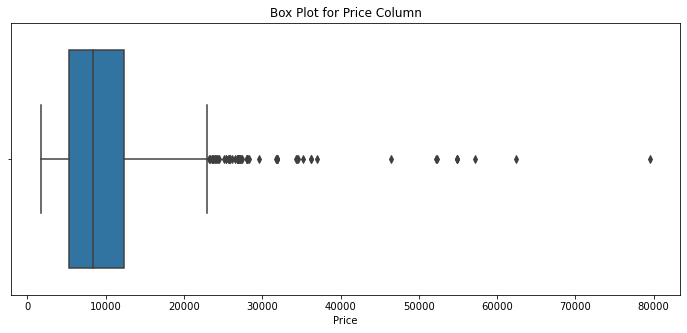

In [60]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Price')
plt.title("Box Plot for Price Column")
plt.show()

We can see that there are so many outliers in the Price but we cannot remove those as they are very important for our Data Analysis and Prediction.

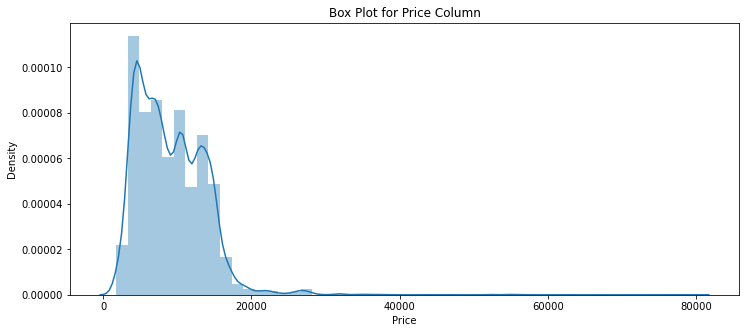

In [61]:
plt.figure(figsize=(12,5))
sns.distplot(df.Price)
plt.title("Box Plot for Price Column")
plt.show()

We can see in the Histogram that the Price column have multiple normal distributions and it is Skewwed on the right side.

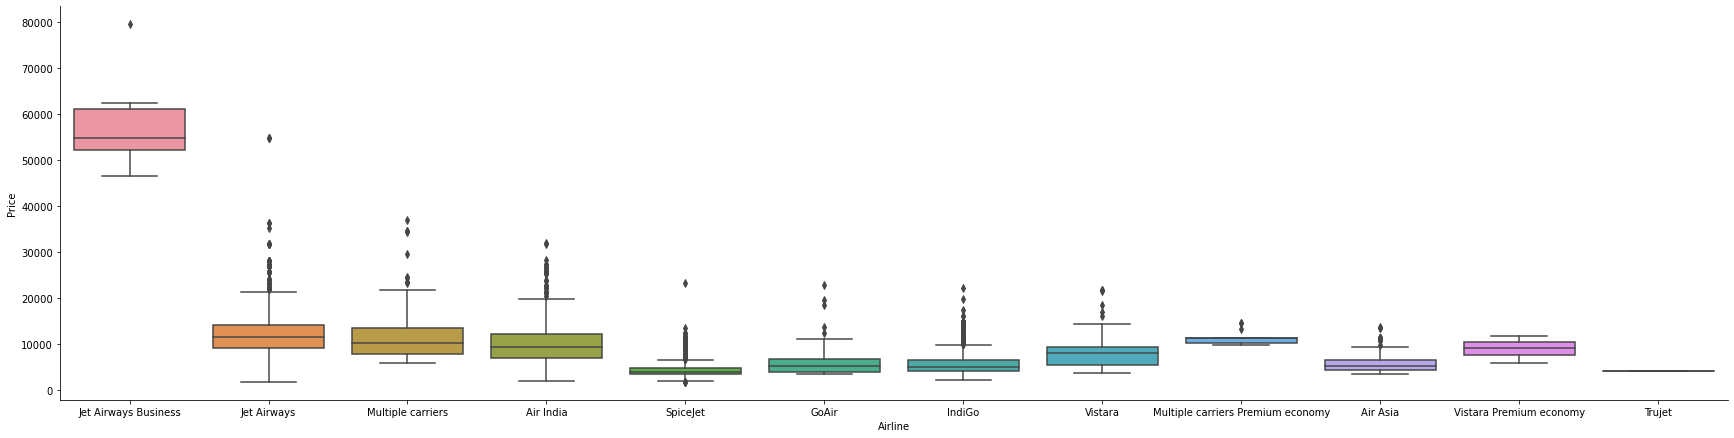

In [62]:
# Airline vs Price
sns.catplot(data = df.sort_values("Price", ascending = False), y = "Price", x = "Airline",  kind="box", height = 6, aspect = 4)
plt.show()

We can see that the expect the Jet Airways Business Airline all the airlines have almost the same median

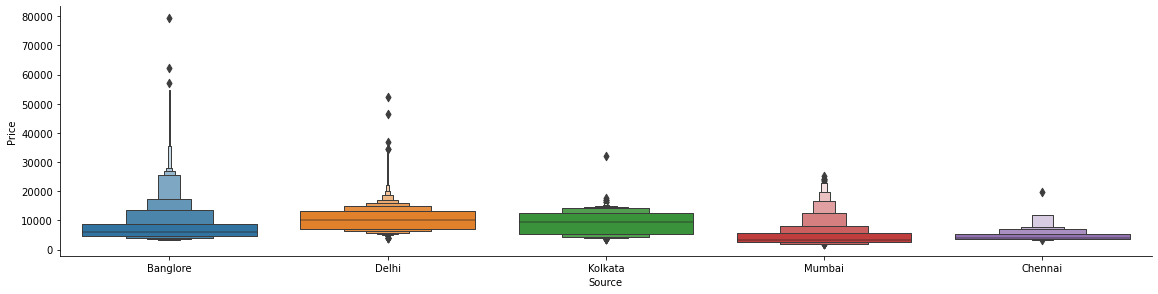

In [63]:
# Source vs Price
sns.catplot(data=df.sort_values('Price', ascending=False), x='Source', y='Price', kind='boxen', height = 4, aspect = 4)

We can see that the price from the Source Banglore are more compared to other place but median value of Delhi is more amoung the others

In [64]:
df.groupby(['Journey_Month']).Price.sum().sort_values(ascending = False)

Journey_Month
5    31627560
6    30141510
3    29073812
4     6226744
Name: Price, dtype: int64

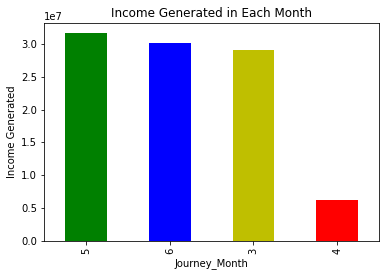

In [65]:
df.groupby(['Journey_Month']).Price.sum().sort_values(ascending = False).plot(kind='bar', color=['g','b','y','r'])
plt.ylabel('Income Generated')
plt.title("Income Generated in Each Month")
plt.show()

Based on the numbers and graph we can say they there is more income generated in the Month of May and June followed by March and April. <br/><br/>
As we can see there is not much of difference between March, May and June but there is big downfall in the month on April.

In [66]:
df.groupby(['Airline']).Price.sum().sort_values(ascending=False)

Airline
Jet Airways                          44817461
Air India                            16831361
Multiple carriers                    13039603
IndiGo                               11648071
Vistara                               3734451
SpiceJet                              3548717
Air Asia                              1783293
GoAir                                 1137045
Jet Airways Business                   350152
Multiple carriers Premium economy      148445
Vistara Premium economy                 26887
Trujet                                   4140
Name: Price, dtype: int64

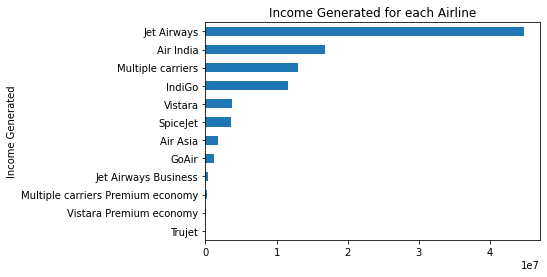

In [68]:
df.groupby(['Airline']).Price.sum().sort_values().plot(kind='barh')
plt.title("Income Generated for each Airline")
plt.ylabel("Income Generated")
plt.show()

We can clearly see that Jet Airways has generated more income than any other Airlines in this span of four months provided in the data set.

In [69]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Day,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,16,50,21,35,4,45


In [70]:
df['Journey_Day'].value_counts()

Wednesday    2079
Monday       1849
Thursday     1832
Saturday     1670
Sunday       1474
Friday        909
Tuesday       869
Name: Journey_Day, dtype: int64

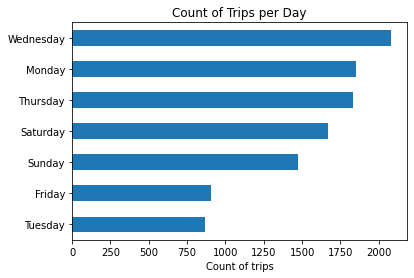

In [71]:
df['Journey_Day'].value_counts().sort_values().plot(kind='barh')
plt.title('Count of Trips per Day')
plt.xlabel('Count of trips')
plt.show()

We can evidently see that there are more number of trips taken place on **Wednesday**. We can see that there are less number of trips taken place in the Weekends.

In [72]:
df.groupby(['Journey_Day']).Price.sum().sort_values(ascending=False)

Journey_Day
Wednesday    19287952
Thursday     16362287
Monday       15716652
Saturday     14984752
Sunday       14040600
Friday        8833659
Tuesday       7843724
Name: Price, dtype: int64

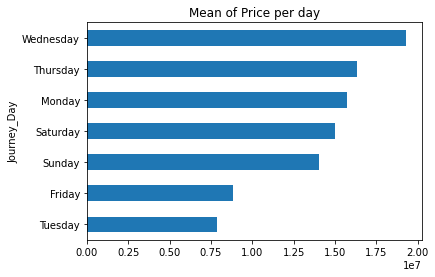

In [74]:
df.groupby(['Journey_Day']).Price.sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Mean of Price per day')
plt.show()

We can see that total sum of price of trips is more on Wednesday followed by the other days

<AxesSubplot:>

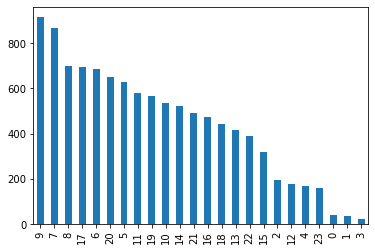

In [75]:
df['Dept_Hour'].value_counts().sort_values(ascending=False).plot(kind='bar')

We can see that there are more number of planes that were departed at 9 in the morning followed by 7AM

### Multi Variate Analysis

In [76]:
df.corr()

,Total_Stops,Price,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.740049,-0.136749
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508902,-0.124899
Journey_Date,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022109,-0.008915
Journey_Month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016061,-0.040854
Dept_Hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002903,-0.023723
Dept_Minute,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022030,0.092443
Arrival_Hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055300,-0.118315
Arrival_Minute,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074352,0.151571
Duration_Hour,0.740049,0.508902,-0.022109,0.016061,0.002903,-0.022030,0.055300,-0.074352,1.000000,-0.126528
Duration_Minute,-0.136749,-0.124899,-0.008915,-0.040854,-0.023723,0.092443,-0.118315,0.151571,-0.126528,1.000000


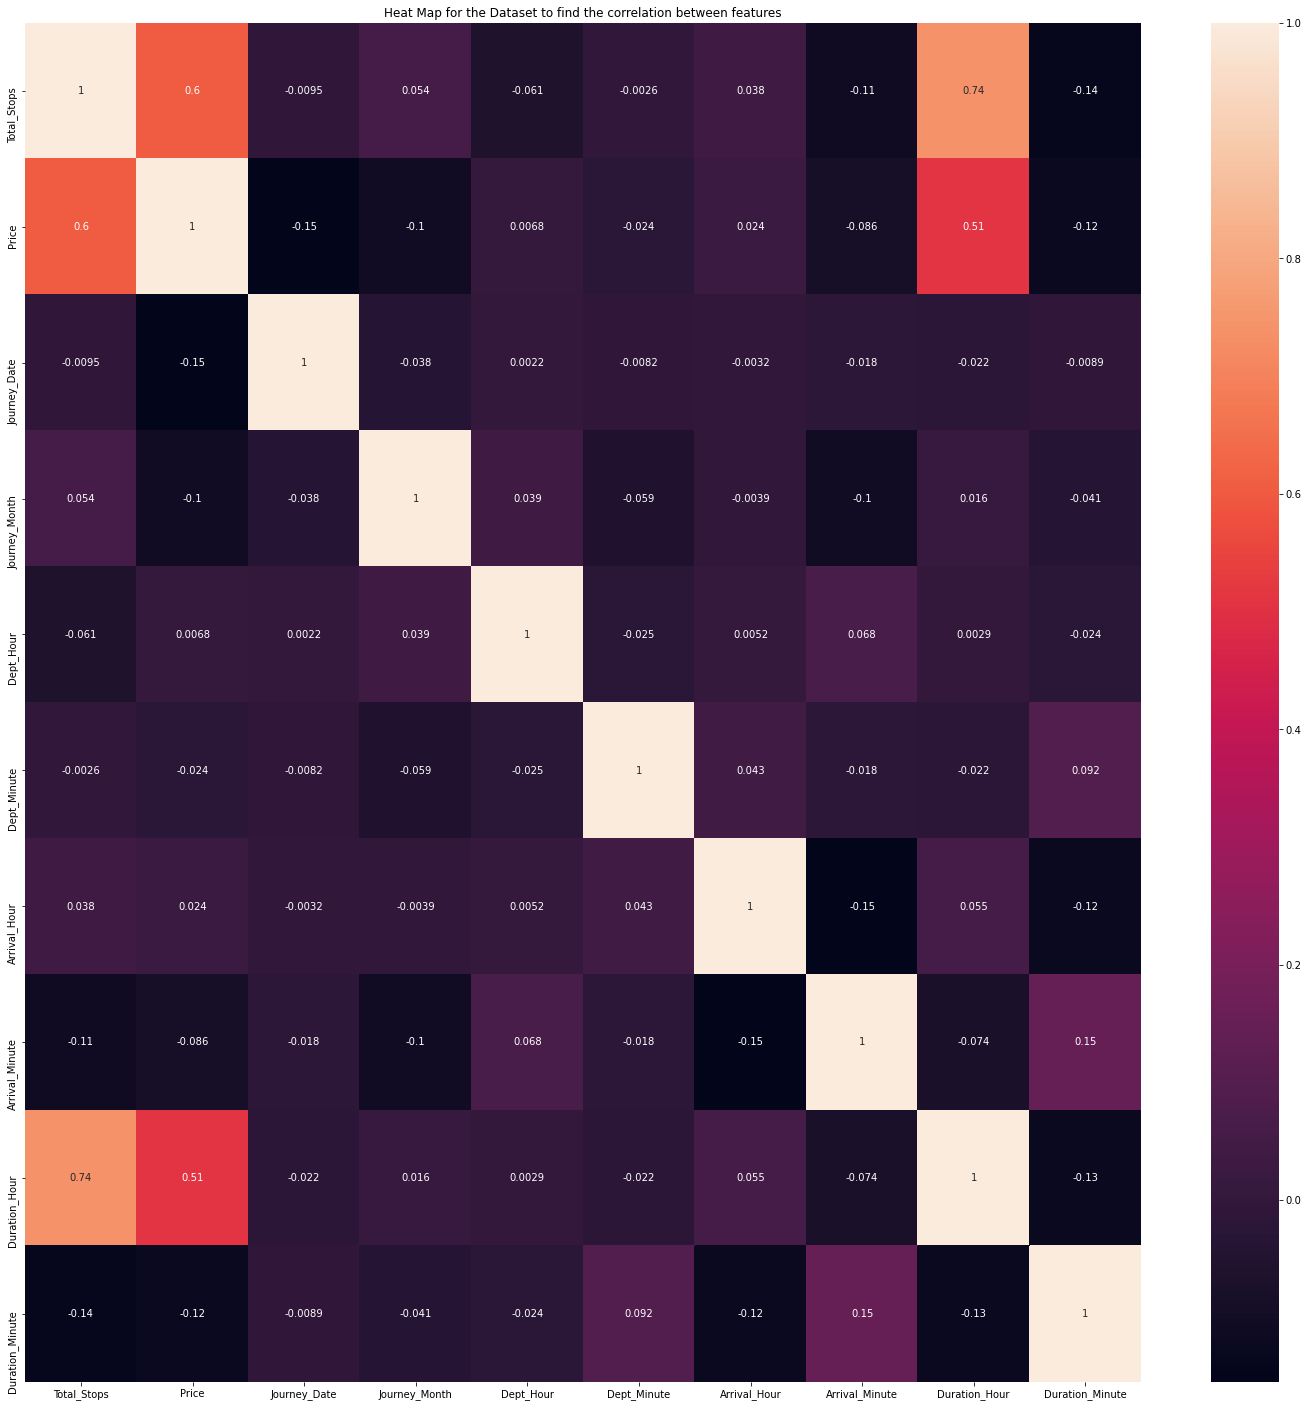

In [77]:
plt.figure(figsize=(25,25))

sns.heatmap(df.corr(), annot=True)
plt.title("Heat Map for the Dataset to find the correlation between features")
plt.show()

As we can see in the heat map that there is not much of Multi Collinearity between the variables and hence we can proceed with the Model Building with these features.

<Figure size 1224x1224 with 0 Axes>

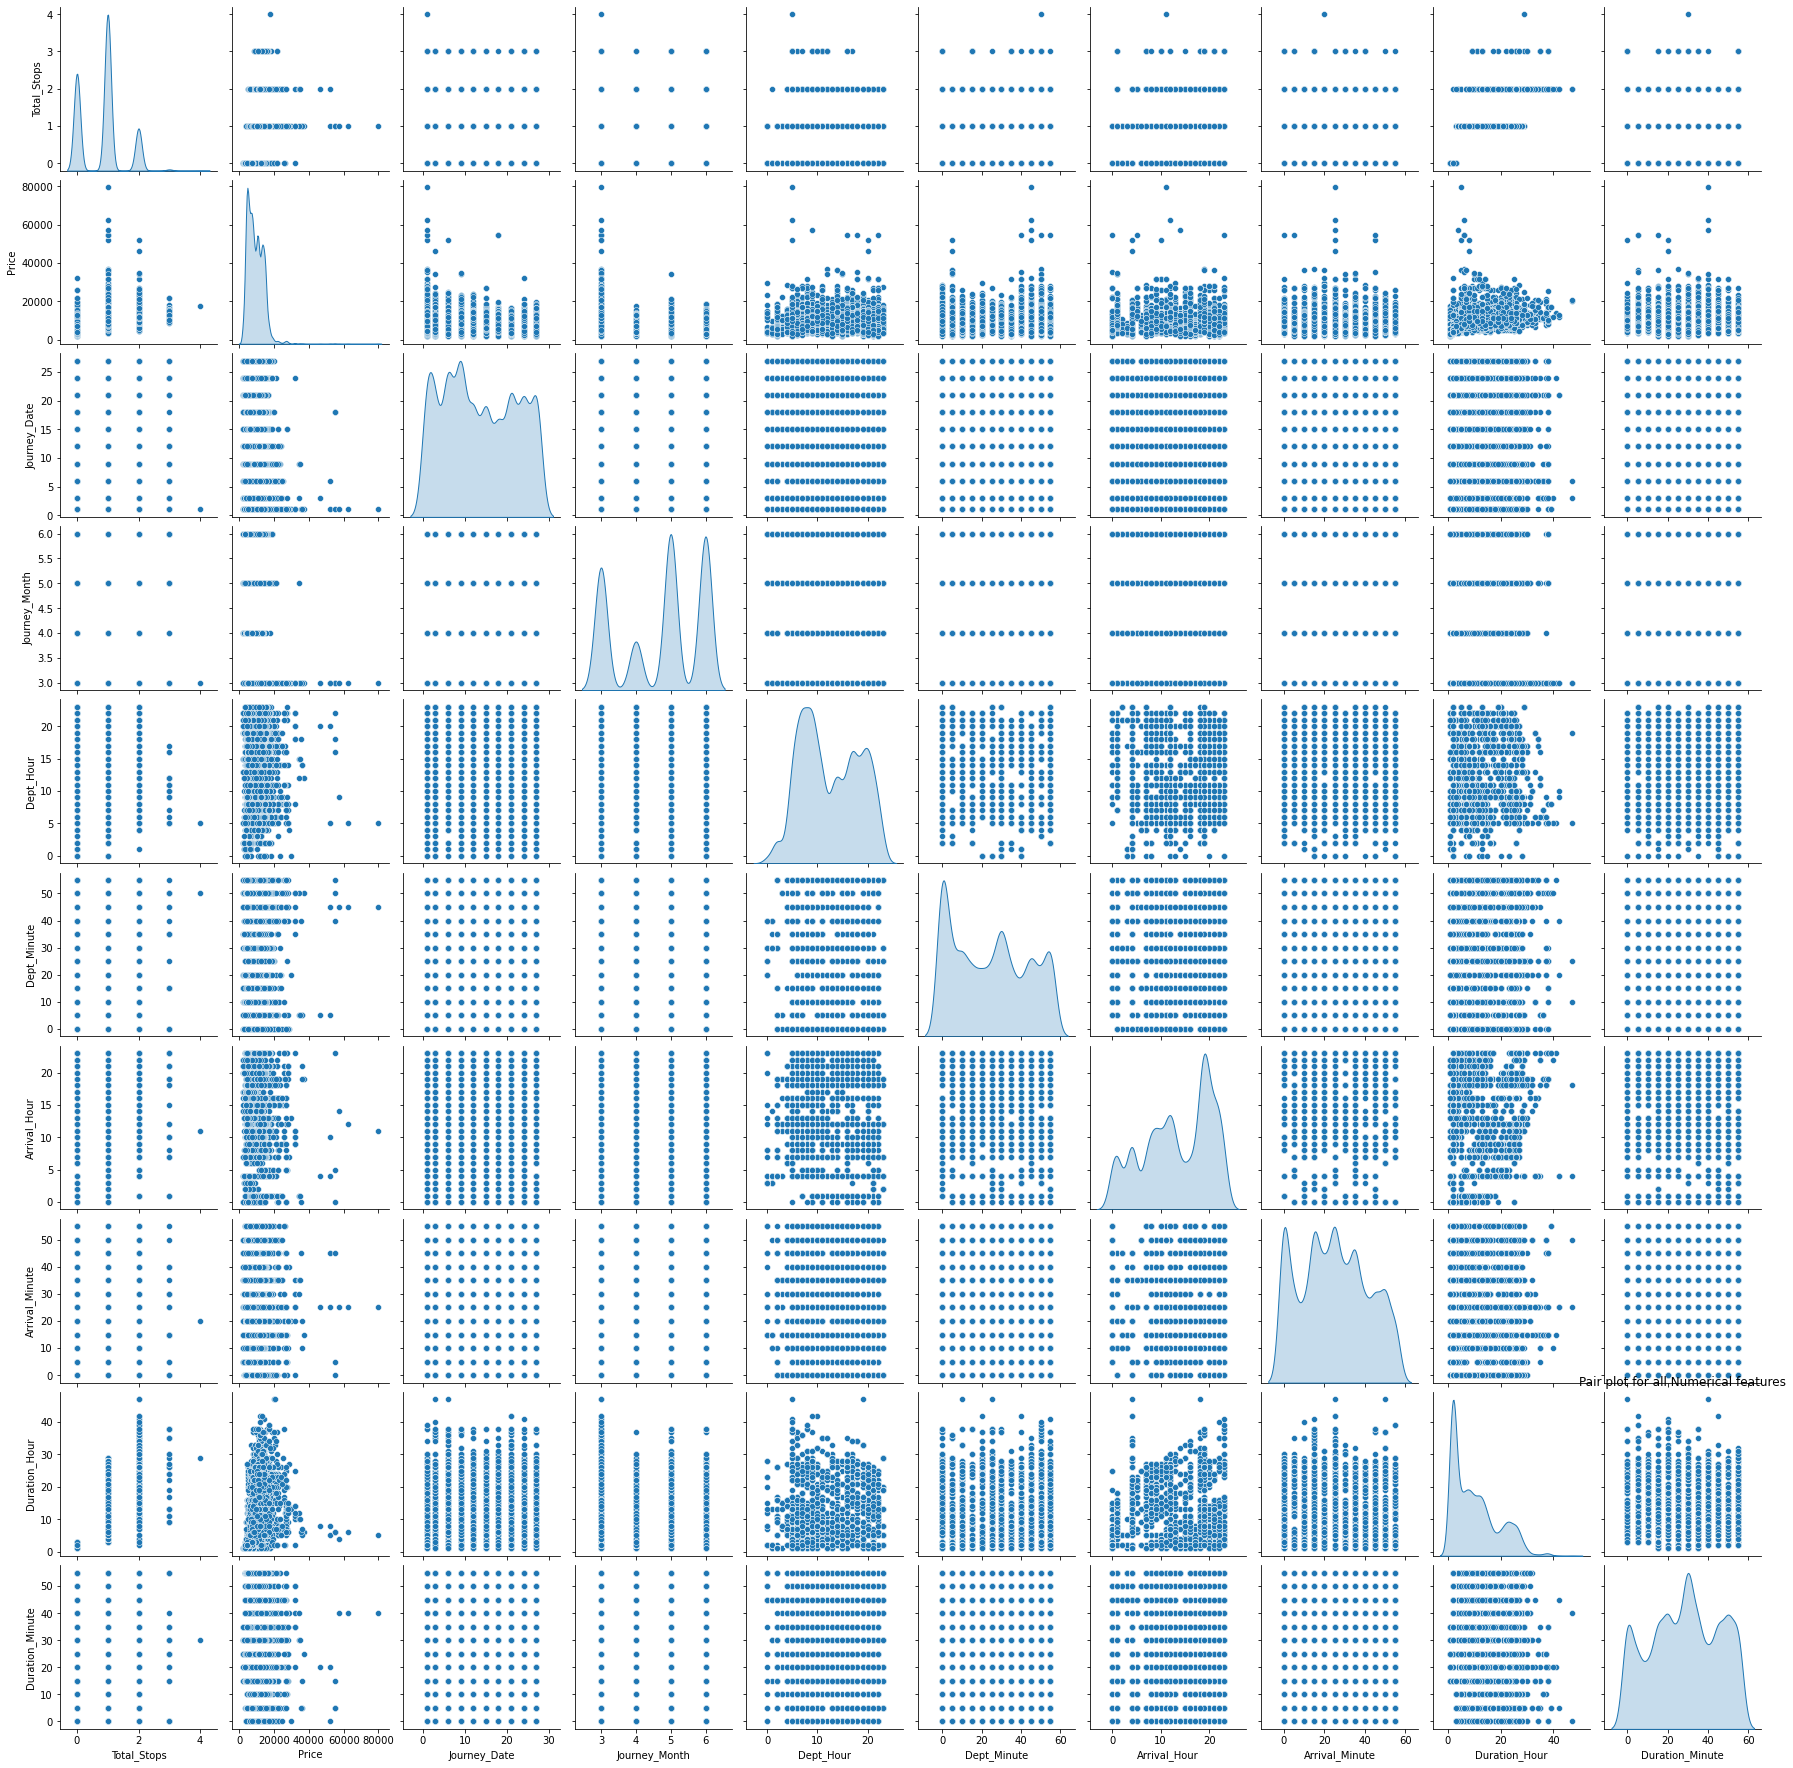

In [79]:
plt.figure(figsize=(17,17))
sns.pairplot(df, diag_kind ='kde')
plt.title("Pair plot for all Numerical features")
plt.show()

### OneHot Encoding

In [78]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Price               int64
Journey_Date        int64
Journey_Month       int64
Journey_Day        object
Dept_Hour           int64
Dept_Minute         int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration_Hour       int64
Duration_Minute     int64
dtype: object

In [79]:
columns_obj = df[['Airline', 'Source', 'Destination']]

In [80]:
df = df.drop('Journey_Day', axis=1)

In [81]:
df1 = pd.get_dummies(columns_obj, drop_first = True)

In [82]:
df1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [83]:
df = pd.concat([df, df1], axis=1)

In [84]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df = df.drop(['Airline', 'Source', 'Destination'], axis=1)

In [86]:
df.dtypes

Total_Stops                                  int64
Price                                        int64
Journey_Date                                 int64
Journey_Month                                int64
Dept_Hour                                    int64
Dept_Minute                                  int64
Arrival_Hour                                 int64
Arrival_Minute                               int64
Duration_Hour                                int64
Duration_Minute                              int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

In [87]:
df.shape

(10682, 30)

### Applying the same process to Test Data

In [88]:
df_test = pd.read_excel("Test_set.xlsx")

In [89]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [90]:
#Applying all the changes made for Training Data to testing data to make both behave in a same way

df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [91]:
df_test.shape

(2671, 10)

In [92]:
#Handling Day of Journey
df_test['Journey_Date'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.day
df_test['Journey_Month'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.month
df_test.drop('Date_of_Journey', axis=1, inplace=True)
print("Handled Day of Journey")
print("--" *60)

#Handling Dept Time
df_test['Dept_Hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dept_Minute'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop('Dep_Time', axis=1, inplace=True)
print("Handled Dept Time")
print("--" *60)

#Handling Arrival Time
df_test['Arrival_Hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Minute'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop('Arrival_Time', axis=1, inplace=True)
print("Handled Arrival TIme")
print("--" *60)

#Handling Total Stops'
df_test['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace = True)
print("Handled Total Stops")
print("--" *60)

#Handling Duration
df_test['Duration_Hour'] = df_test['Duration'].str.split(" ", expand=True)[0]
df_test['Duration_Hour'] = df_test['Duration_Hour'].str.split('h', expand=True)[0]
df_test['Duration_Hour'] = df_test['Duration_Hour'].str.replace('5m','5')
df_test['Duration_Hour'] = df_test['Duration_Hour'].astype('int64')

df_test['Duration_Minute'] = df_test['Duration'].str.split(" ", expand=True)[1]
df_test['Duration_Minute'] = df_test['Duration_Minute'].str.split('m', expand=True)[0]
df_test['Duration_Minute'].fillna('0', inplace=True)
df_test['Duration_Minute'] = df_test['Duration_Minute'].astype('int64')
print("Handled Duration Time")
print(df['Duration_Hour'].dtypes)
print(df['Duration_Minute'].dtypes)
df_test.drop('Duration', axis=1, inplace=True)
print("--" *60)


#Handling Route, Addition Info Features
df_test.drop(['Route', 'Additional_Info'], axis=1, inplace=True)
print('Handled Route and Additional Info')
print("--" *60)

#Printing Test Columns
print(df_test.columns)
print("--" *60)

#Printing Datatypes
print(df_test.dtypes)
print("--" *60)

#Printing Shape
print(df_test.shape)
print("--" *60)

Handled Day of Journey
------------------------------------------------------------------------------------------------------------------------
Handled Dept Time
------------------------------------------------------------------------------------------------------------------------
Handled Arrival TIme
------------------------------------------------------------------------------------------------------------------------
Handled Total Stops
------------------------------------------------------------------------------------------------------------------------
Handled Duration Time
int64
int64
------------------------------------------------------------------------------------------------------------------------
Handled Route and Additional Info
------------------------------------------------------------------------------------------------------------------------
Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_Date',
       'Journey_Month', 'Dept_Hour', 'Dept_Minute'

In [93]:
#Label Encoing
columns_obj_test = df_test[['Airline', 'Source', 'Destination']]

#Using Dummy Encoding
df1_test = pd.get_dummies(columns_obj_test, drop_first = True)
print("Dummy Encoding Done")
print("--" *60)

#Concating Dataframes
df_test = pd.concat([df_test, df1_test], axis=1)
print("Concatination Done")
print("--" *60)

#Dropping Categorical Columns
df_test = df_test.drop(['Airline', 'Source', 'Destination'], axis=1)
print("Categorical Columns Dropped")
print("--" *60)

#Printing Datetypes
print("Checking if all the features are numerical")
print(df_test.dtypes)
print("--" *60)

#Checking Null values
print("Checking for null values")
print(df_test.isna().sum())
print("--" *60)

#Printing shape
print("Checking the shape of test dataset")
print(df_test.shape)
print("--" *60)

Dummy Encoding Done
------------------------------------------------------------------------------------------------------------------------
Concatination Done
------------------------------------------------------------------------------------------------------------------------
Categorical Columns Dropped
------------------------------------------------------------------------------------------------------------------------
Checking if all the features are numerical
Total_Stops                                  int64
Journey_Date                                 int64
Journey_Month                                int64
Dept_Hour                                    int64
Dept_Minute                                  int64
Arrival_Hour                                 int64
Arrival_Minute                               int64
Duration_Hour                                int64
Duration_Minute                              int64
Airline_Air India                            uint8
Airline_GoAir    

### Model Building 

In [94]:
y = df['Price']

In [95]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [96]:
X = df.drop('Price', axis=1)

In [97]:
X.head()

,Total_Stops,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


#### Splitting the data into training and test set 70:30

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)

In [100]:
X.describe()

,Total_Stops,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.245366,28.326156,0.163921,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494489,16.946530,0.370221,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see the values are not on same scale. So we are bringing them on a same scale using Min Max scalar

### Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
forest = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=18)

In [176]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=18)

In [177]:
forest.score(X_test, y_test)

0.8146873053895615

In [178]:
forest.score(X_train, y_train)

0.9428949346955028

In [179]:
y_pred = forest.predict(X_test)

In [180]:
from sklearn import metrics

In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 1145.1794277108318
MSE: 3780550.6769639836
RMSE: 1944.3638231987304


In [182]:
forest_score = metrics.r2_score(y_test, y_pred)
forest_score

0.8146873053895615

In [183]:
#Adding score results to dataframe
results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'Accuracy': forest_score, 'RMSE': rmse}, index={'1'})
results = results_1[['Algorithm', 'Accuracy', 'RMSE']]
results

,Algorithm,Accuracy,RMSE
1,Random Forest,0.814687,1944.363823


### K Fold Cross Validation for Random Forest

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [185]:
k = 20
kfold = KFold(n_splits=k, random_state=20)
k_results = cross_val_score(forest, X, y, cv = kfold)
accuracy = np.mean(abs(k_results))
accuracy

0.8313354791763023

In [186]:
y_kfold_pred = cross_val_predict(forest, X, y, cv=kfold)

In [187]:
print('MAE:', metrics.mean_absolute_error(y, y_kfold_pred))
print('MSE:', metrics.mean_squared_error(y, y_kfold_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_kfold_pred)))

rmse_kfold = np.sqrt(metrics.mean_squared_error(y, y_kfold_pred))

MAE: 1137.9493370524765
MSE: 3583565.3488984127
RMSE: 1893.030731102486


In [188]:
results_2 = pd.DataFrame({'Algorithm': 'K Fold CV for Random Forest', 'Accuracy': accuracy, 'RMSE': rmse_kfold}, index={2})
results = pd.concat([results, results_2])
results = results[['Algorithm', 'Accuracy', 'RMSE']]
results

,Algorithm,Accuracy,RMSE
1,Random Forest,0.814687,1944.363823
2,K Fold CV for Random Forest,0.831335,1893.030731


### Scaling

In [189]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [190]:
X_train = scaler.fit_transform(X_train)

In [191]:
X_test = scaler.transform(X_test)

In [192]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns = X.columns)

In [193]:
X_train.head(3)

,Total_Stops,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,1.000000,1.000000,0.434783,0.363636,0.478261,0.909091,0.000000,0.545455,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.00,0.769231,1.000000,0.739130,0.181818,0.826087,0.727273,0.021739,0.545455,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,1.000000,0.666667,0.652174,0.000000,0.043478,0.545455,0.195652,0.545455,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [194]:
X_train.describe()

,Total_Stops,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,...,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000,7477.000000
mean,0.206701,0.485551,0.570461,0.540643,0.448454,0.578068,0.449828,0.200816,0.515666,0.162632,...,0.000134,0.036779,0.423031,0.268557,0.062726,0.423031,0.119165,0.062726,0.036779,0.089742
std,0.168761,0.325728,0.388420,0.250356,0.340267,0.298710,0.300615,0.184603,0.310263,0.369054,...,0.011565,0.188232,0.494073,0.443239,0.242485,0.494073,0.324005,0.242485,0.188232,0.285831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.192308,0.000000,0.304348,0.090909,0.347826,0.181818,0.021739,0.272727,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.423077,0.666667,0.478261,0.454545,0.608696,0.454545,0.152174,0.545455,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.769231,1.000000,0.739130,0.727273,0.826087,0.636364,0.304348,0.818182,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Support Vector Regressor

In [195]:
from sklearn.svm import SVR

In [196]:
svr = SVR(kernel='linear', C=100, gamma='auto')

In [197]:
svr.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [198]:
svr.score(X_test, y_test)

0.5608879931242838

In [199]:
svr.score(X_train, y_train)

0.5208629209386153

In [200]:
y_pred = svr.predict(X_test)

In [201]:
svr_score = metrics.r2_score(y_test, y_pred)
svr_score

0.5608879931242838

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 1904.2692001188636
MSE: 8958291.812370477
RMSE: 2993.040563101422


In [203]:
#Adding the second results to dataframe
results_2 = pd.DataFrame({'Algorithm':['SVR'], 'Accuracy': [svr_score], 'RMSE': rmse}, index={3})
results = pd.concat([results, results_2])
results = results[['Algorithm','Accuracy', 'RMSE']]
results

,Algorithm,Accuracy,RMSE
1,Random Forest,0.814687,1944.363823
2,K Fold CV for Random Forest,0.831335,1893.030731
3,SVR,0.560888,2993.040563


### Gradient Boost Regressor

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

In [205]:
gbr = GradientBoostingRegressor(n_estimators=300)

In [206]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=300)

In [207]:
gbr.score(X_test, y_test)

0.8234334344539554

In [208]:
gbr.score(X_train, y_train)

0.834016460604108

In [209]:
y_pred = gbr.predict(X_test)

In [210]:
gbr_score = metrics.r2_score(y_test, y_pred)
gbr_score

0.8234334344539554

In [211]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 1350.2843905169818
MSE: 3602121.5400680024
RMSE: 1897.9255886540975


In [212]:
#Adding the second results to dataframe
results_2 = pd.DataFrame({'Algorithm':['Gradient Boost'], 'Accuracy': [gbr_score], 'RMSE': rmse}, index={4})
results = pd.concat([results, results_2])
results = results[['Algorithm','Accuracy', 'RMSE']]
results

,Algorithm,Accuracy,RMSE
1,Random Forest,0.814687,1944.363823
2,K Fold CV for Random Forest,0.831335,1893.030731
3,SVR,0.560888,2993.040563
4,Gradient Boost,0.823433,1897.925589


#### Linear Regression

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
lr = LinearRegression()

In [215]:
lr.fit(X_train, y_train)

LinearRegression()

In [216]:
lr.score(X_test, y_test)

0.6263919372557311

In [217]:
lr.score(X_train, y_train)

0.6216960700942382

In [218]:
y_pred = lr.predict(X_test)

In [219]:
lr_score = metrics.r2_score(y_test, y_pred)
lr_score

0.6263919372557311

In [220]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 1937.8778611588573
MSE: 7621950.657488774
RMSE: 2760.7880500843908


In [221]:
#Adding the second results to dataframe
results_2 = pd.DataFrame({'Algorithm':['Linear Regression'], 'Accuracy': [lr_score], 'RMSE': rmse}, index={5})
results = pd.concat([results, results_2])
results = results[['Algorithm','Accuracy', 'RMSE']]
results

,Algorithm,Accuracy,RMSE
1,Random Forest,0.814687,1944.363823
2,K Fold CV for Random Forest,0.831335,1893.030731
3,SVR,0.560888,2993.040563
4,Gradient Boost,0.823433,1897.925589
5,Linear Regression,0.626392,2760.788050


### KNN Regressor

In [222]:
from sklearn.neighbors import KNeighborsRegressor

In [223]:
knn_reg = []
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    knn_reg.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean Error')

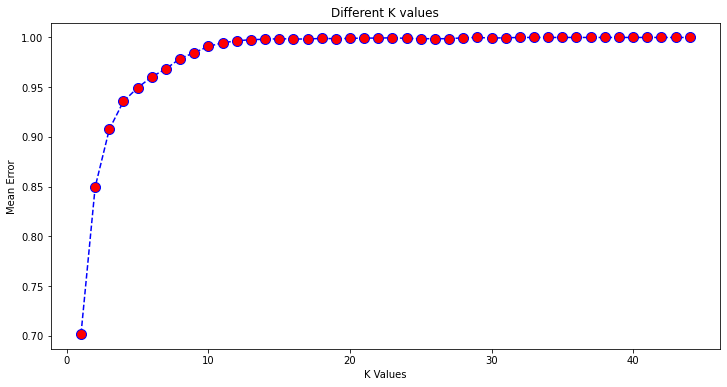

In [224]:
#Plotting the results
plt.figure(figsize=(12,6))
plt.plot(range(1,45), knn_reg, color='b', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('Different K values')
plt.xlabel('K Values')
plt.ylabel('Mean Error')

In [225]:
knn = KNeighborsRegressor(n_neighbors = 3, n_jobs=50, p=1)

In [226]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=50, n_neighbors=3, p=1)

In [227]:
knn.score(X_test, y_test)

0.7578561445327231

In [228]:
knn.score(X_train, y_train)

0.8626262202803721

In [229]:
y_pred = knn.predict(X_test)

In [230]:
knn_score = metrics.r2_score(y_test, y_pred)
knn_score

0.7578561445327231

In [231]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 1379.4650026001043
MSE: 4939959.017022015
RMSE: 2222.6018575134


In [232]:
#Adding the second results to dataframe
results_2 = pd.DataFrame({'Algorithm':['KNN Regressor'], 'Accuracy': [knn_score], 'RMSE': rmse}, index={6})
results = pd.concat([results, results_2])
results = results[['Algorithm','Accuracy', 'RMSE']]
results

,Algorithm,Accuracy,RMSE
1,Random Forest,0.814687,1944.363823
2,K Fold CV for Random Forest,0.831335,1893.030731
3,SVR,0.560888,2993.040563
4,Gradient Boost,0.823433,1897.925589
5,Linear Regression,0.626392,2760.788050
6,KNN Regressor,0.757856,2222.601858


### Sorting Results by Accuracy Score

In [233]:
results.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy,RMSE
2,K Fold CV for Random Forest,0.831335,1893.030731
4,Gradient Boost,0.823433,1897.925589
1,Random Forest,0.814687,1944.363823
6,KNN Regressor,0.757856,2222.601858
5,Linear Regression,0.626392,2760.788050
3,SVR,0.560888,2993.040563


We can see that **Random Forest Regressor** and **Gradient Boosting Regression** models are giving us high accuracy. Let us check the preformance of these models using the Performance metrics and check if the accuracy obtained is reliable or not.

#### Checking Random Forest Regressor

In [524]:
forest = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=18)
forest.fit(X_train, y_train)

print("Testing Data Accuracy Score: {:.2f}%".format(forest.score(X_test, y_test)*100))
print("--"*60)
print("Training Data Accuracy Score: {:.2f}%".format(forest.score(X_train, y_train)*100))
print("--"*60)
y_pred = forest.predict(X_test)

mae_forest = metrics.mean_absolute_error(y_test, y_pred)
rmse_forest = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("--"*60)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print("--"*60)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("--"*60)

forest_score = metrics.r2_score(y_test, y_pred)
print("R2 score:", forest_score)
print("--"*60)


Testing Data Accuracy Score: 81.47%
------------------------------------------------------------------------------------------------------------------------
Training Data Accuracy Score: 94.29%
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error: 1145.1794277108318
------------------------------------------------------------------------------------------------------------------------
Mean Squared Error: 3780550.6769639836
------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error: 1944.3638231987304
------------------------------------------------------------------------------------------------------------------------
R2 score: 0.8146873053895615
------------------------------------------------------------------------------------------------------------------------


As we can see that the Accuracy of *Training Data* is more than the Accuracy of *Testing Data* which is clearly **Over Fitting**. Let us do some Hyperparameter to avoid the Over Fitting of the model and bring the best accuracy for the model. Also let us find the best features of the model.

In [525]:
#Adding the second results to dataframe
final_results = pd.DataFrame({'Algorithm':['Random Forest Regressor'], 'Accuracy': [forest_score],
                             'MAE': mae_forest, 'RMSE': rmse_forest}, index={1})
final_results = final_results[['Algorithm','Accuracy', 'MAE', 'RMSE']]
final_results

,Algorithm,Accuracy,MAE,RMSE
1,Random Forest Regressor,0.814687,1145.179428,1944.363823


### Hyperparameter Tuning

First let us perform Randomized Search CV and then take the best parameter from the result and then apply those parameters in Grid Search CV and get the best parameters and use those parameters to build the Machine Learning model to get the best accuracy.

### RandomizedSearchCV for Random Forest

In [192]:
from sklearn.model_selection import RandomizedSearchCV

In [193]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse', 'mae']}


print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [194]:
forest = RandomForestRegressor()

In [195]:
forest_randomcv=RandomizedSearchCV(estimator=forest, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, 
                               random_state=100, n_jobs=-1)

In [196]:
# Fitting the model to RandomizedSearch CV


forest_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 77.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [197]:
forest_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [198]:
forest_randomcv.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=14,
                      n_estimators=2000)

In [199]:
best_random_grid=forest_randomcv.best_estimator_

In [200]:
best_random_grid=forest_randomcv.best_estimator_

In [201]:
y_pred_randomcv = best_random_grid.predict(X_test)

In [202]:
forest_randomcv_score = metrics.r2_score(y_test, y_pred_randomcv)
forest_randomcv_score

0.8019260057692423

In [203]:
forest_randomcv.best_estimator_.score(X_train, y_train)

0.8557274166204438

### GridSearchCV for Random Forest

In [204]:
forest_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [205]:
from sklearn.model_selection import GridSearchCV

In [206]:
param_grid = {
    'criterion': [forest_randomcv.best_params_['criterion']],
    'max_depth': [forest_randomcv.best_params_['max_depth']],
    'max_features': [forest_randomcv.best_params_['max_features']],
    'min_samples_leaf': [forest_randomcv.best_params_['min_samples_leaf'], 
                         forest_randomcv.best_params_['min_samples_leaf']+2, 
                         forest_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [forest_randomcv.best_params_['min_samples_split'] - 2,
                          forest_randomcv.best_params_['min_samples_split'] - 1,
                          forest_randomcv.best_params_['min_samples_split'], 
                          forest_randomcv.best_params_['min_samples_split'] +1,
                          forest_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [forest_randomcv.best_params_['n_estimators'] - 200, forest_randomcv.best_params_['n_estimators'] - 100, 
                     forest_randomcv.best_params_['n_estimators'], 
                     forest_randomcv.best_params_['n_estimators'] + 100, forest_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['mse'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [207]:
grid_search=GridSearchCV(estimator=forest, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

In [208]:
# Fitting the model to GridSearch CV

grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 63.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 117.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 155.2min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [209]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=12,
                      n_estimators=1900)

In [210]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=12,
                      n_estimators=1900)

In [211]:
y_pred_grid = best_grid.predict(X_test)

In [212]:
forest_grid_score = metrics.r2_score(y_test, y_pred_grid)
forest_grid_score

0.8030884208645799

In [213]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 1145.1794277108318
MSE: 3780550.6769639836
RMSE: 1944.3638231987304


In [214]:
grid_score = metrics.r2_score(y_test, y_pred_grid)
grid_score

0.8030884208645799

In [215]:
grid_search.best_estimator_.score(X_test, y_test)

0.8030884208645799

In [216]:
grid_search.best_estimator_.score(X_train, y_train)

0.859245616096974

In [217]:
grid_search.best_estimator_.feature_importances_ 

array([3.54854210e-02, 1.09892523e-01, 5.82236439e-02, 1.38134143e-02,
       1.23294550e-02, 2.99885497e-02, 1.39187244e-02, 4.84739208e-01,
       6.92375914e-03, 5.41978115e-03, 3.94418355e-04, 1.17425908e-02,
       7.17023856e-02, 7.97892429e-02, 2.28649706e-02, 9.36251676e-04,
       2.34081725e-03, 0.00000000e+00, 2.71576609e-03, 0.00000000e+00,
       2.92599296e-04, 2.46639342e-03, 4.26030228e-03, 3.88173423e-03,
       2.38410171e-03, 1.50130578e-04, 3.78021344e-03, 2.85605457e-04,
       1.92779970e-02])

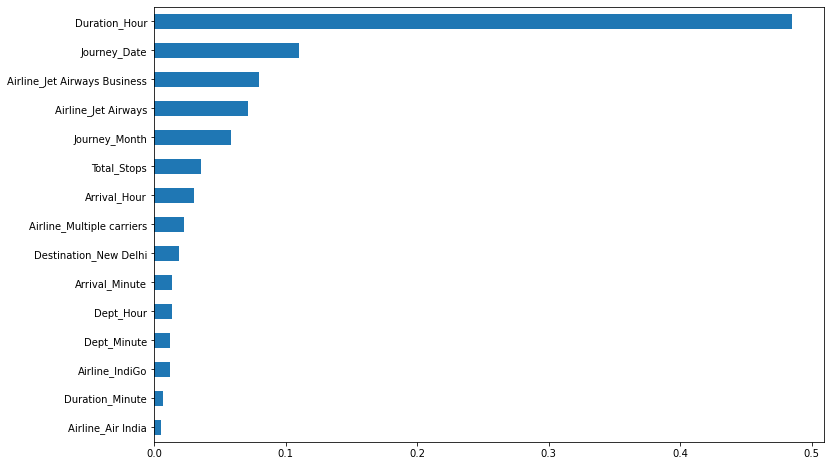

In [218]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_ , index=X.columns)
feat_importances.nlargest(15).sort_values(ascending = True).plot(kind='barh')
plt.show()

In [526]:
print("Testing Data Accuracy Score: {:.2f}%".format(grid_search.best_estimator_.score(X_test, y_test)*100))
print("--"*60)
print("Training Data Accuracy Score: {:.2f}%".format(grid_search.best_estimator_.score(X_train, y_train)*100))
print("--"*60)
y_pred_grid = best_grid.predict(X_test)

mae_grid = metrics.mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_grid))
print("--"*60)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_grid))
print("--"*60)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid)))
print("--"*60)

grid_search_score = metrics.r2_score(y_test, y_pred_grid)
print("R2 score:", grid_search_score)
print("--"*60)

Testing Data Accuracy Score: 80.31%
------------------------------------------------------------------------------------------------------------------------
Training Data Accuracy Score: 85.92%
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error: 1282.5291825445543
------------------------------------------------------------------------------------------------------------------------
Mean Squared Error: 4017178.6685601734
------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error: 2004.290065973529
------------------------------------------------------------------------------------------------------------------------
R2 score: 0.8030884208645799
------------------------------------------------------------------------------------------------------------------------


In [527]:
#Adding the second results to dataframe
final_results_2 = pd.DataFrame({'Algorithm':['Random Forest Regressor with Grid SearchCV'], 'Accuracy': [grid_search_score],
                             'MAE': mae_grid, 'RMSE': rmse_grid}, index={2})
final_results = pd.concat([final_results, final_results_2])
final_results = final_results[['Algorithm','Accuracy', 'MAE', 'RMSE']]
final_results

,Algorithm,Accuracy,MAE,RMSE
1,Random Forest Regressor,0.814687,1145.179428,1944.363823
2,Random Forest Regressor with Grid SearchCV,0.803088,1282.529183,2004.290066


As we can see, after the Hyperparameter tuning we got the Accuracy for Testing Data as 80.32% and Accuracy for Testing Data is 85.92% where there was no over fitting of the model. 

Now let us check the values of **Gradient Boosting Regression** Model and check if it is over fitting and see if we can use that model for prediction.

#### Checking Gradient Boosting Regressor

In [528]:
gbr = GradientBoostingRegressor(n_estimators=300)
gbr.fit(X_train, y_train)


print("Testing Data Accuracy Score: {:.2f}%".format(gbr.score(X_test, y_test)*100))
print("--"*60)
print("Training Data Accuracy Score: {:.2f}%".format(gbr.score(X_train, y_train)*100))
print("--"*60)
y_pred = gbr.predict(X_test)

mae_gbr = metrics.mean_absolute_error(y_test, y_pred)
rmse_gbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("--"*60)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print("--"*60)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("--"*60)

gbr_score = metrics.r2_score(y_test, y_pred)
print("R2 score:", gbr_score)
print("--"*60)


Testing Data Accuracy Score: 82.35%
------------------------------------------------------------------------------------------------------------------------
Training Data Accuracy Score: 83.40%
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error: 1350.1451658651895
------------------------------------------------------------------------------------------------------------------------
Mean Squared Error: 3600726.4527282943
------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error: 1897.5580235471837
------------------------------------------------------------------------------------------------------------------------
R2 score: 0.8235018179822371
------------------------------------------------------------------------------------------------------------------------


In [529]:
#Adding the second results to dataframe
final_results_2 = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'], 'Accuracy': [gbr_score],
                             'MAE': mae_gbr, 'RMSE': rmse_gbr}, index={3})
final_results = pd.concat([final_results, final_results_2])
final_results = final_results[['Algorithm','Accuracy', 'MAE', 'RMSE']]
final_results

,Algorithm,Accuracy,MAE,RMSE
1,Random Forest Regressor,0.814687,1145.179428,1944.363823
2,Random Forest Regressor with Grid SearchCV,0.803088,1282.529183,2004.290066
3,Gradient Boosting Regressor,0.823502,1350.145166,1897.558024


As we can see that the Accuracy of Training Data and Testing Data which is clearly not Over Fitting. We can also see that it have a better accuracy and RMSE value than the Random Forest Regressor which underwent hyperparameter tuning. Let us do some **Manual Hyperparameter tuning** to see if the model can do any better.

In [530]:
gbr = GradientBoostingRegressor(n_estimators = 200, 
                                criterion = 'mse', 
                                max_depth = 5, 
                                min_samples_split = 4)
gbr.fit(X_train, y_train)


print("Testing Data Accuracy Score: {:.2f}%".format(gbr.score(X_test, y_test)*100))
print("--"*60)
print("Training Data Accuracy Score: {:.2f}%".format(gbr.score(X_train, y_train)*100))
print("--"*60)
y_pred = gbr.predict(X_test)

mae_hyp = metrics.mean_absolute_error(y_test, y_pred)
rmse_hyp = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("--"*60)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print("--"*60)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("--"*60)

gbr_score = metrics.r2_score(y_test, y_pred)
print("R2 score:", gbr_score)
print("--"*60)

Testing Data Accuracy Score: 85.11%
------------------------------------------------------------------------------------------------------------------------
Training Data Accuracy Score: 90.43%
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error: 1182.4663839609495
------------------------------------------------------------------------------------------------------------------------
Mean Squared Error: 3038176.7696852437
------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error: 1743.0366518479304
------------------------------------------------------------------------------------------------------------------------
R2 score: 0.8510765303785468
------------------------------------------------------------------------------------------------------------------------


In [531]:
#Adding the second results to dataframe
final_results_2 = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor after Tuning'], 'Accuracy': [gbr_score],
                             'MAE': mae_hyp, 'RMSE': rmse_hyp}, index={4})
final_results = pd.concat([final_results, final_results_2])
final_results = final_results[['Algorithm','Accuracy', 'MAE', 'RMSE']]
final_results

,Algorithm,Accuracy,MAE,RMSE
1,Random Forest Regressor,0.814687,1145.179428,1944.363823
2,Random Forest Regressor with Grid SearchCV,0.803088,1282.529183,2004.290066
3,Gradient Boosting Regressor,0.823502,1350.145166,1897.558024
4,Gradient Boosting Regressor after Tuning,0.851077,1182.466384,1743.036652


After doing the **Manual Hyperparameter Tuning** for the **Gradient Boosting Regressor** model, we can clearly see there has been an improvement in the Model performance. Also the RAE and RMSE value has been decreased. The model is also not over fitting which is good thing. Now let us find the **Important Features** and check their importance in contributing to the Model.

In [223]:
gbr.feature_importances_ 

array([3.75131337e-02, 8.97000923e-02, 8.66256445e-02, 1.63344784e-02,
       1.26005154e-02, 3.10027880e-02, 1.48697666e-02, 4.63417642e-01,
       1.28675084e-02, 4.81437560e-03, 1.14872421e-03, 1.62783403e-02,
       7.20119513e-02, 7.66013020e-02, 1.73823715e-02, 9.60630027e-04,
       2.60454553e-03, 7.19433494e-05, 2.32591807e-03, 0.00000000e+00,
       1.72428313e-04, 3.57126413e-03, 8.99123866e-03, 2.91559357e-03,
       2.35123568e-03, 2.68687957e-04, 3.81572360e-03, 1.10282196e-04,
       1.86718749e-02])

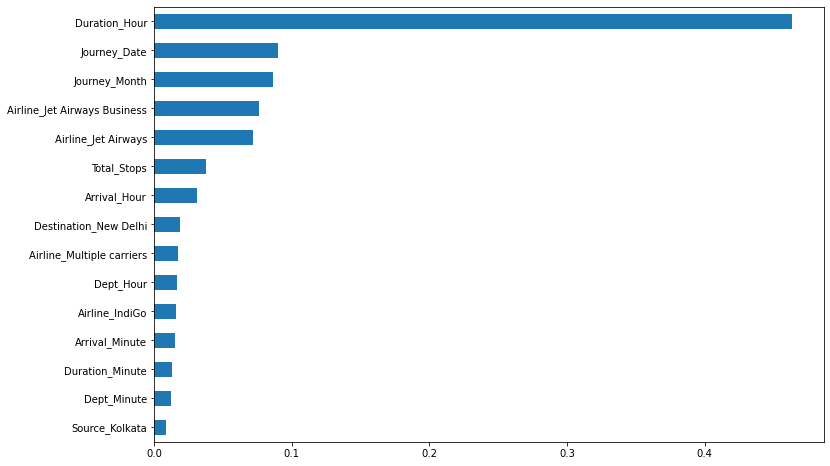

In [224]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(gbr.feature_importances_ , index=X.columns)
feat_importances.nlargest(15).sort_values(ascending = True).plot(kind='barh')
plt.show()

In [225]:
imp_features = ['Duration_Hour', 'Journey_Date', 'Journey_Month', 'Airline_Jet Airways Business', 'Airline_Jet Airways', 'Total_Stops',
       'Arrival_Hour', 'Destination_New Delhi', 'Airline_Multiple carriers', 'Airline_IndiGo', 'Dept_Hour', 'Arrival_Minute', 
       'Dept_Minute', 'Duration_Minute', 'Source_Kolkata']
imp_features

['Duration_Hour',
 'Journey_Date',
 'Journey_Month',
 'Airline_Jet Airways Business',
 'Airline_Jet Airways',
 'Total_Stops',
 'Arrival_Hour',
 'Destination_New Delhi',
 'Airline_Multiple carriers',
 'Airline_IndiGo',
 'Dept_Hour',
 'Arrival_Minute',
 'Dept_Minute',
 'Duration_Minute',
 'Source_Kolkata']

In [226]:
feat_imp =  pd.DataFrame(gbr.feature_importances_ , index=X.columns, columns=['Importance'])
feat_imp.sort_values(by='Importance', ascending=False)

,Importance
Duration_Hour,0.463418
Journey_Date,0.089700
Journey_Month,0.086626
Airline_Jet Airways Business,0.076601
Airline_Jet Airways,0.072012
Total_Stops,0.037513
Arrival_Hour,0.031003
Destination_New Delhi,0.018672
Airline_Multiple carriers,0.017382
Dept_Hour,0.016334


These are the some of the important features that contributed more in builduing the **Gradient Boosting Algorithm** for model prediction. <br/>
The Top 6 important features for this Model are: <br/>
* **Duration Hour**
* **Journey_Date**
* **Journey_Month**
* **Airline_JetAirways_Business**
* **Airline_JetAirways**
* **Total_Stops**

We can see the Accuracy value of **Gradient Boosting Regression Model** is **85.1%**. The Model is also not over fitting and the **MAE** value is **1181.6** and the **RMSE** value is **1741.2** which is the least of all the Models. Hence we are using this model for our prediction. 

### Prediction

In [508]:
pd.set_option("display.max_columns", None)
X.head(1)

,Total_Stops,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [509]:
X.columns

Index(['Total_Stops', 'Journey_Date', 'Journey_Month', 'Dept_Hour',
       'Dept_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour',
       'Duration_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [513]:
data = pd.DataFrame({'Total_Stops': [1,2,0],
                    'Journey_Date':  [ 12,14,23],
                    'Journey_Month':  [ 6,3,5],
                    'Dept_Hour':  [15,12,10],
                    'Dept_Minute':  [ 5 ,30,0],
                    'Arrival_Hour': [ 17,19,12],
                    'Arrival_Minute':  [0,25,0],
                    'Duration_Hour':  [5,3,3],
                    'Duration_Minute':  [15,0,0],
                    'Airline_Air India':  [0,0,0],
                    'Airline_GoAir': [0,0,0],
                    'Airline_IndiGo': [1,0,1],
                    'Airline_Jet Airways': [0,1,0],
                    'Airline_Jet Airways Business': [0,0,0],
                    'Airline_Multiple carriers': [0,0,0],
                    'Airline_SpiceJet': [0,0,0],
                    'Airline_Vistara': [0,0,0],
                    'Source_Delhi':  [1,0,1],
                    'Source_Kolkata': [0,1,0],
                    'Source_Mumbai':  [0,0,0],
                    'Destination_Cochin':  [1,0,1],
                    'Destination_Hyderabad':  [0,0,0],
                    'Destination_New Delhi':  [0,1,0],
                    'Airline_Trujet': [0,0,0],
                    'Airline_Multiple carriers Premium economy': [0,0,0],
                    'Destination_Delhi':[0,0,0],
                    'Source_Chennai':[0,0,0],
                    'Destination_Kolkata': [0,0,0],
                    'Airline_Vistara Premium economy': [0,0,0]
                    })
data

,Total_Stops,Journey_Date,Journey_Month,Dept_Hour,Dept_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_New Delhi,Airline_Trujet,Airline_Multiple carriers Premium economy,Destination_Delhi,Source_Chennai,Destination_Kolkata,Airline_Vistara Premium economy
0,1,12,6,15,5,17,0,5,15,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,14,3,12,30,19,25,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,23,5,10,0,12,0,3,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


We have the data as following:
* 1 Stop, Indigo, Delhi to Cochin
* 2 Stops, Jet Airways, Kolkata to New Delhi
* 0 Stop, Indigo, Delhi to Cochin

In [514]:
data = scaler.transform(data)

In [515]:
gbr.predict(data)

array([ 9906.21425147, 12603.61689456,  6112.94191358])

These are the predicted Prices for the given values

## Thank you!